# Simple PADRE demonstration code

This notebook shows how to use code for the algorith PADRE, from

"Pairwise Difference Regression: A Machine Learning Meta-algorithm for
Improved Prediction and Uncertainty Quantification in Chemical Search"
Michael Tynes, Wenhao Gao, Daniel J. Burrill, Enrique R. Batista,
Danny Perez, Ping Yang, and Nicholas Lubbers
Journal of Chemical Information and Modeling 2021, 61, 8.
Available at:
https://doi.org/10.1021/acs.jcim.1c00670

First, we make a regression problem using the built-in sklearn learn tools for toy problems.

In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("Number of samples:",X.shape[0])
print("Number of features:",X.shape[1])

Number of samples: 100
Number of features: 100


The PADRERegressor just needs to be given a base_regressor argument that it will wrap:

In [2]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)

from minervachem.padre import PADRERegressor # < this is the key meta-regressor
padre_rf = PADRERegressor(
    base_regressor=RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
)

In [10]:
%%time
rf.fit(X_train, y_train)

CPU times: user 116 ms, sys: 33.6 ms, total: 150 ms
Wall time: 63.3 ms


RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)

Fitting the PADRE model is as simple as any other sklearn model.

In [4]:
%%time
padre_rf.fit(X_train, y_train)

CPU times: user 24.3 s, sys: 97.4 ms, total: 24.4 s
Wall time: 2.73 s


Note that because the PADRE meta-algorithm analyzes pairs of samples, it typically takes longer fit than the corresponding base regressor.

In [5]:
from sklearn.metrics import mean_squared_error
rf_err = mean_squared_error(y_test, rf.predict(X_test))
padre_err = mean_squared_error(y_test, padre_rf.predict(X_test))

rf_err, padre_err, padre_err / rf_err

(14459.618191411077, 6415.495918982584, 0.44368363217179196)

In [6]:
print("Improvement of PADRE:",((rf_err/padre_err)-1)*100, "%")

Improvement of PADRE: 125.38582167322443 %


Note that the improvement found will vary as a function of the random_state seed used in the make_regression function!

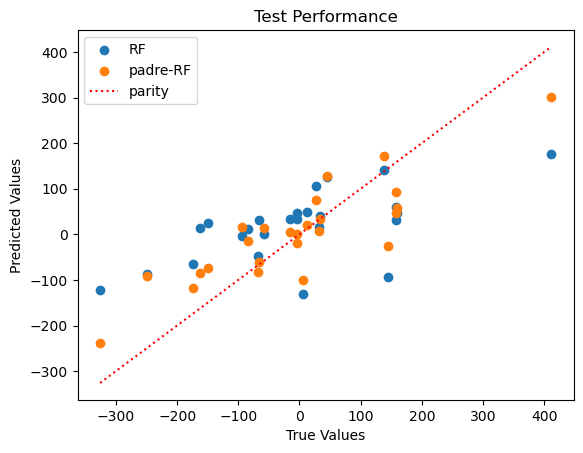

In [9]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(y_test,rf.predict(X_test),label='RF')
plt.scatter(y_test,padre_rf.predict(X_test),label='padre-RF')
plt.plot((y_test.min(),y_test.max()),(y_test.min(),y_test.max()),label='parity',ls=':',c='r')
plt.legend()
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Test Performance")
plt.show()